# Finding lines on Image 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 200

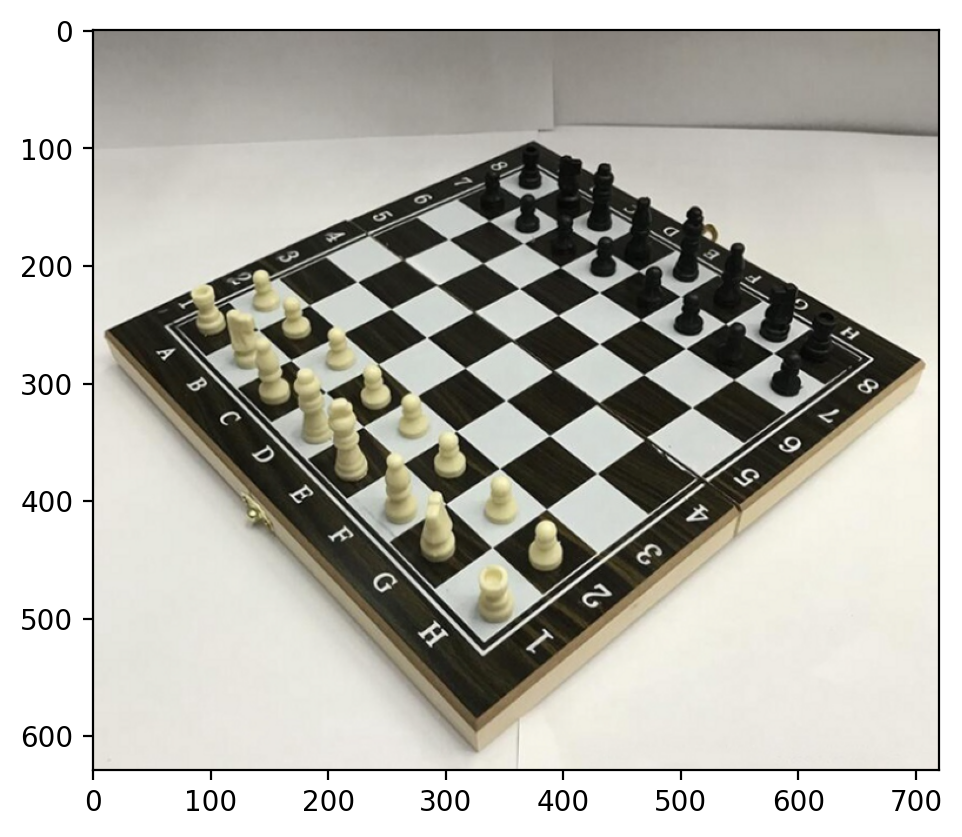

In [2]:
img = cv2.imread('img/chess_board.png')
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()

## GaussianBlur

In [3]:
# Convert image to grayscale
gray = cv2.cvtColor(im_rgb, cv2.COLOR_BGR2GRAY)

In [4]:
kernel_size = 5
blured = cv2.GaussianBlur(gray, (kernel_size, kernel_size),0)

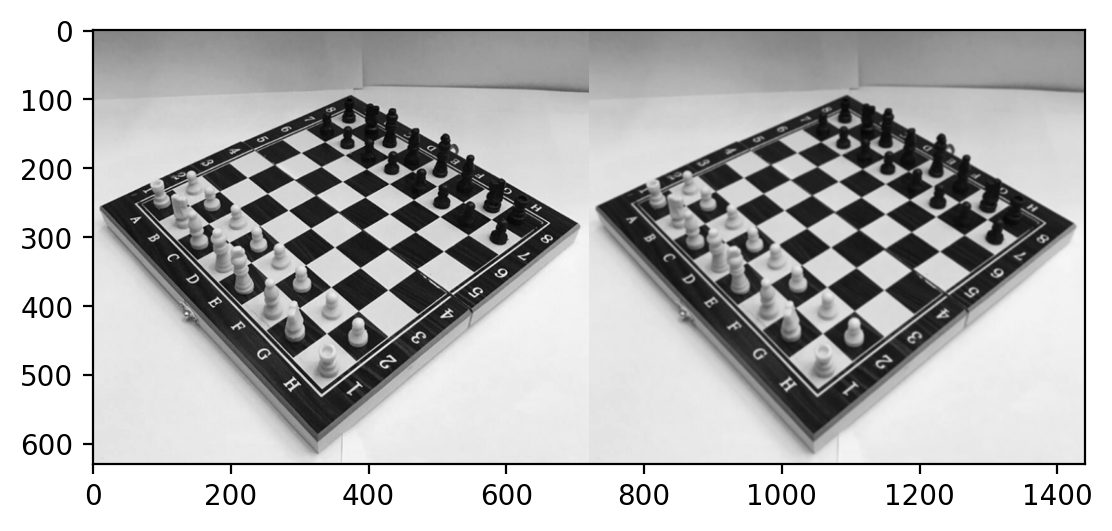

In [5]:
img12 = np.hstack((gray, blured))
plt.imshow(img12, cmap='gray')
plt.show()

## Canny - edge detection

In [7]:
# Define our parameters for Canny
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blured, low_threshold, high_threshold)

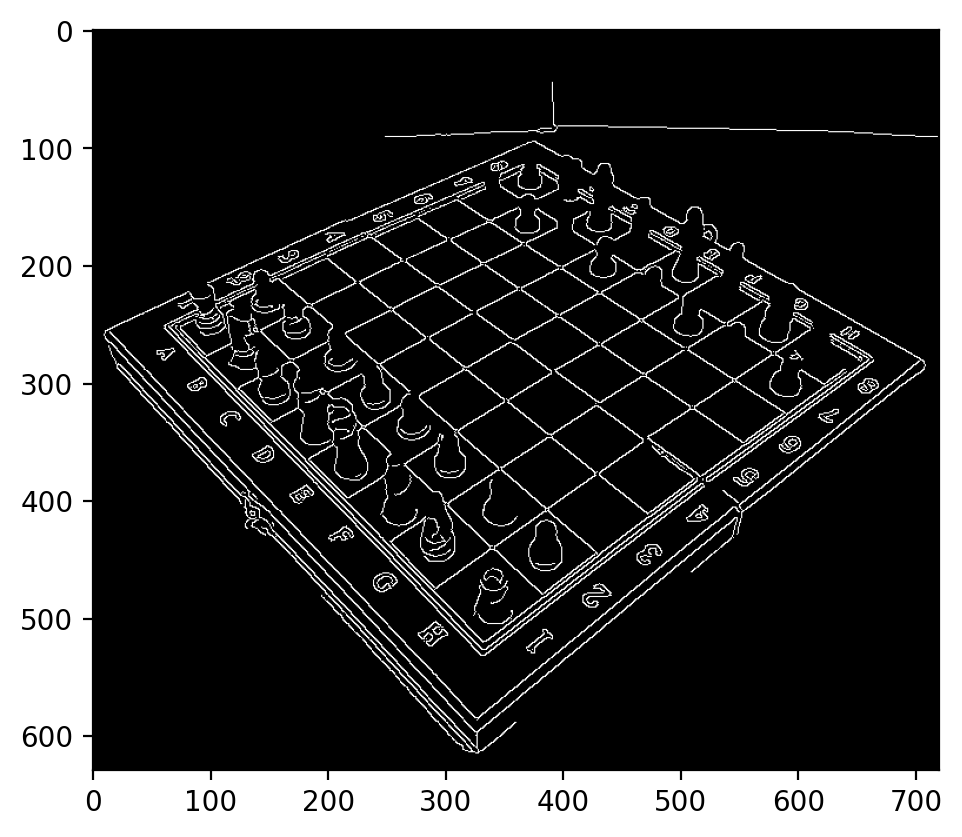

In [9]:
plt.imshow(edges, cmap='gray')
plt.show()

## Hough Transform

In [10]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 100  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 75  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(im_rgb) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

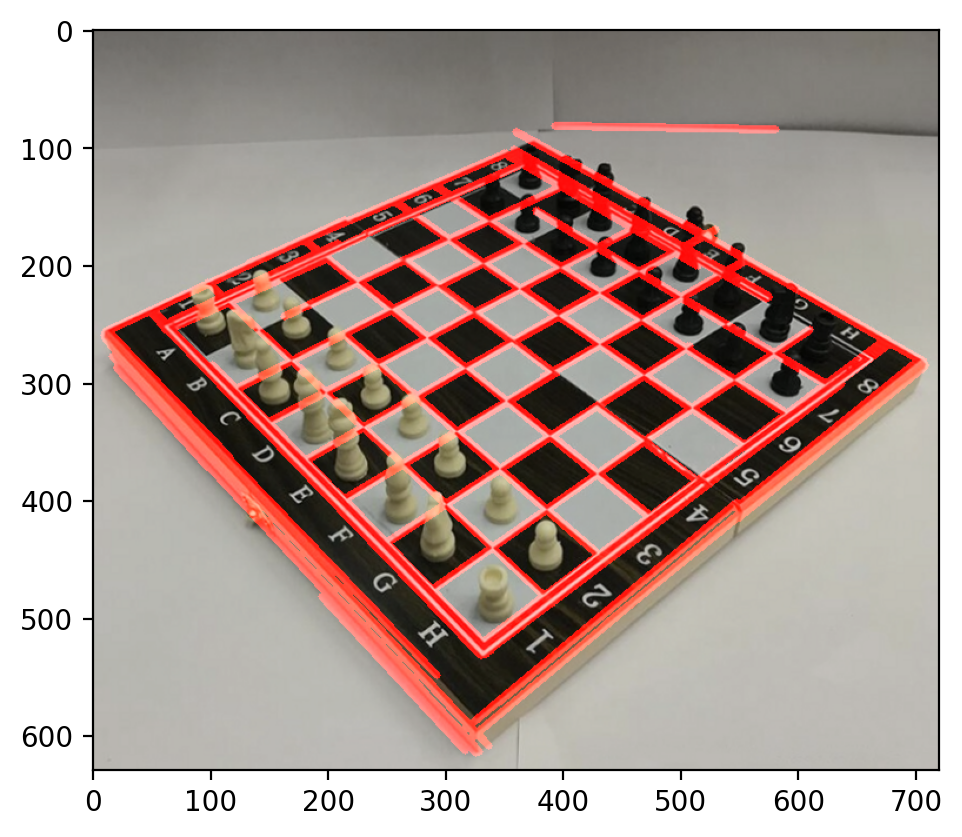

In [11]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(im_rgb, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)
plt.show()